<a href="https://colab.research.google.com/github/mihir3030/google-colab/blob/main/Machine_Learning_Heart_Stroke_Predcition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import os
root = "/content/drive/MyDrive/MLDL/Heart-stroke-prediction"

In [14]:
os.chdir(root)

In [15]:
!pwd

/content/drive/MyDrive/MLDL/Heart-stroke-prediction



<div class="jp-Cell-inputWrapper">

<div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput " data-mime-type="text/markdown">

**Domain:** Health Care - Stroke

**Feature Description** The dataset used for model building contained 5110 observations of 12 variables. The data contains the following information:
* 1) id: unique identifier 
* 2) gender: "Male", "Female" or "Other"
* 3) age: age of the patient
* 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
* 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
* 6) ever_married: "No" or "Yes"
* 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* 8) Residence_type: "Rural" or "Urban"
* 9) avg_glucose_level: average glucose level in blood
* 10) bmi: body mass index
* 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* 12) stroke: 1 if the patient had a stroke or 0 if not


</div>

</div>



<div class="jp-Cell-inputWrapper">

<div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput " data-mime-type="text/markdown">

**Steps to the project:**

**1\. Load the dataset:**

*   Import data and Explore shape and size.

**2\. Data cleaning:**

*   Missing value treatment

*   Convert categorical attributes to continuous using relevant functional knowledge

*   Drop attribute/s if required using relevant functional knowledge

*   Automate all the above steps

**3\. Data analysis & visualisation:**

*   Perform detailed statistical analysis on the data. •
*   Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

**4\. Data pre-processing:**

*   Segregate predictors vs target attributes

*   Check for target balancing and fix it if found imbalanced.

*   Perform train-test split.

*   Check if the train and test data have similar statistical characteristics when compared with original data.

**5\. Model training, testing and tuning:**

*   Train and test  models taught in the learning module.


*   Display the classification accuracies for train and test data.

*   Apply all the possible tuning techniques to train the best model for the given data.

*   Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.

*   Display and compare all the models designed with their train and test accuracies.

*   Select the final best trained model along with your detailed comments for selecting this model.

*   Pickle the selected model for future use.

**6\. GUI development:**

*   Design a clickable web service application.

*   This application should allow the user to input all future values and on a click use these values on the trained model above to predict.

*   It should display the prediction.

**7\. Conclusion and improvisation:**

*   Write your conclusion on the results.

*   Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points perform a better data analysis in future.

</div>

</div>


In [91]:
# importing all the libraries in one place
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
import sklearn
from sklearn import preprocessing  # for encoding variables
from statsmodels.stats.outliers_influence import variance_inflation_factor  # for calculating VIF

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
# Importing Library

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import GridSearchCV, StratifiedKFold



from sklearn.utils import resample
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from plotnine import *
import plotnine

from itertools import product

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [93]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [95]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Cleaning the dataset

In [96]:
# seeing null values in datasety
print ("\nMissing values :  ", df.isnull().sum())



Missing values :   id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


* only BMI(Body mass index) has null values<br>
we can fill null values in many ways like<br>
1)mean, median, mode method <br>
2)Predicting The Missing Values <Br>
3)deleting rows <br>
There are many more mothods to handle missing values

In [97]:
# in this we use mean to fill null values
df=df.fillna(np.mean(df['bmi']))

In [98]:
# The id column is not relevant
df.drop(columns=['id'],inplace=True) 
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# Data analysis & visualisation:



### Distribution of strokes in the dataset



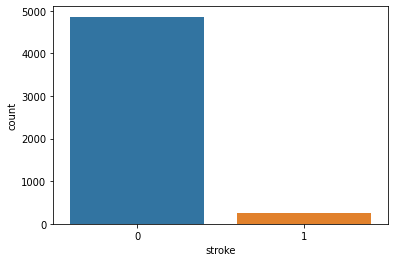

In [99]:
sns.countplot(x='stroke', data=df)

As we can see, our dataset is highly unbalanced. We will have to look into balancing the dataset going ahead.

### Finding insights between bmi and the stroke rate

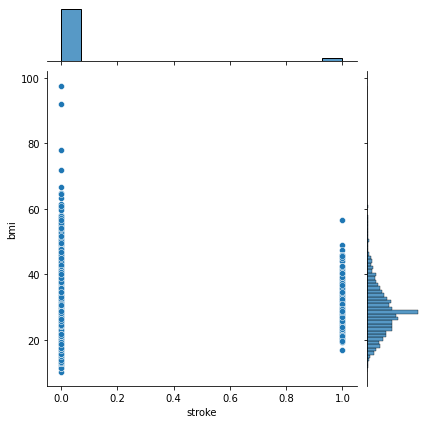

In [100]:
sns.jointplot(df.stroke , df.bmi)

We observe that people below a certain bmi have never had a stroke. Let's plot to see how the risk of getting a stroke scales with the bmi. <br>
Also we can see ther are some outlier in bmi column we can handle it.

### how the risk of getting a stroke scales with the bmi

In [101]:
bmi_perc = []

for i in range(1,15):
  num1 = (df.bmi[df['stroke']==1][df.bmi[df['stroke']==1]<(i*2.5+15)][df.bmi[df['stroke']==1]>((i-1)*2.5+15)]).size
  num0 = (df.bmi[df['stroke']==0][df.bmi[df['stroke']==0]<(i*2.5+15)][df.bmi[df['stroke']==0]>((i-1)*2.5+15)]).size
  bmi_perc.append(round(num1/num0*100, 2))

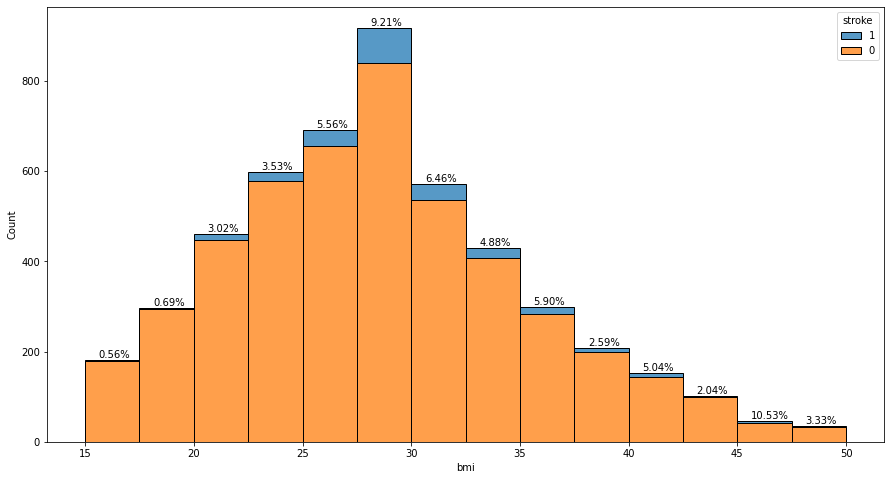

In [102]:
fig, axes = plt.subplots(figsize= (15,8))
ax = sns.histplot(x='bmi', hue='stroke', data=df, multiple='stack', binwidth=2.5, binrange=(15,50), hue_order=[1,0])

h = []
for rectangle in ax.patches:
    h.append(rectangle.get_height())
h = np.array(h).reshape(2, int(len(h)/2))
h = h[0]+h[1]

for i in range(14):
    x = ax.patches[i].get_x()
    y = h[i]
    ax.annotate("{:.2f}%".format(bmi_perc[i]), xy=(x+.625,y+5))

We see that  the rate of having a stroke for people below a bmi of 20 is less than 1%. While the rate of having a stroke for people with a bmi more than 20 is much higher and usually no less than 3% and even reaching a max of 10% in some cases.

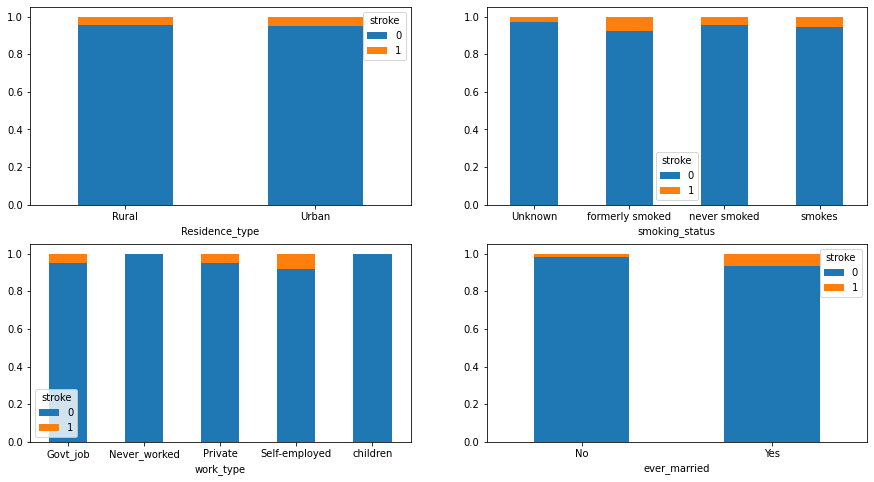

In [103]:
lifestyle = [['Residence_type', 'smoking_status'],['work_type', 'ever_married']]
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(15, 8))
for i in range(2):
  for j in range(2):
    df.groupby(lifestyle[i][j])['stroke'].value_counts(normalize=True).unstack('stroke').plot.bar(stacked=True, ax=ax[i][j], rot=0)

We can clearly observe from the graphs that:
*   Individuals who are married have a higher rate of having strokes than those who are not.
*    Employed individuals are more prone to strokes than children or unemployed people.
*    Former smokers are more prone to strokes than people who are currently smoking or people who have never smoked.
*    Residence type has close to no effect on who are more prone to strokes.

### General heatmap to find correlation between the different features in our dataset 

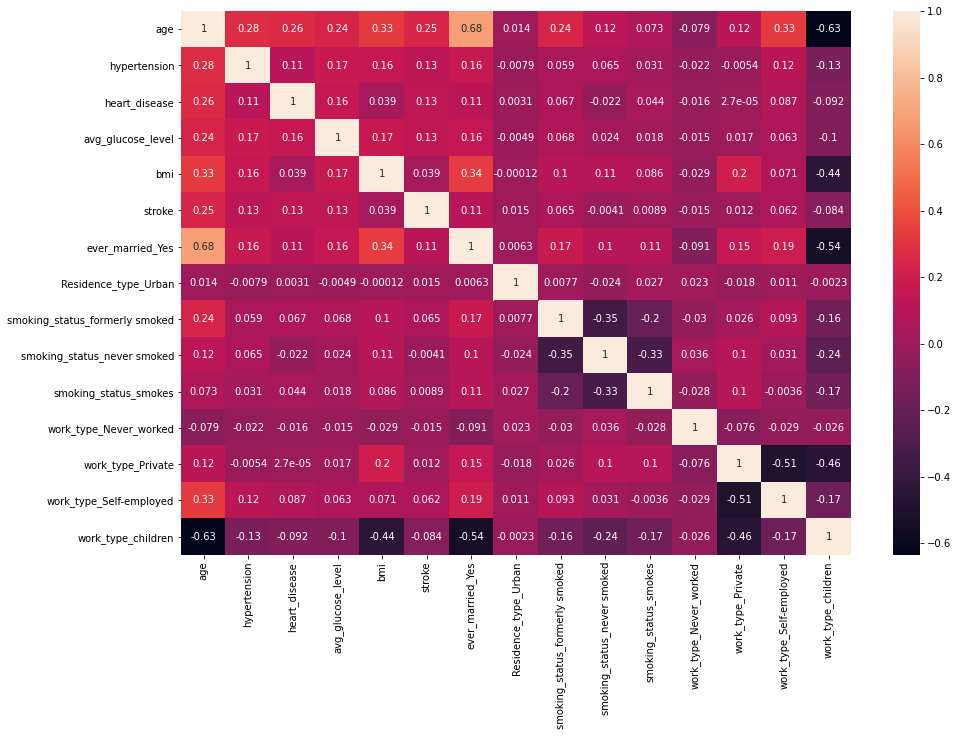

In [104]:
features = pd.get_dummies(df, columns=['ever_married','Residence_type', 'smoking_status','work_type'])
features.drop(columns=['ever_married_No','Residence_type_Rural','smoking_status_Unknown','work_type_Govt_job'], inplace=True)

fig, ax = plt.subplots(figsize= (15,10))
mask = np.triu(features.corr())
sns.heatmap(features.corr(), annot=True,)

We find that the some is corelated but some is not. let's visualizae more

### let's find outliers

In [105]:
# second drop the categorical columns
a = df.dtypes[df.dtypes == "object"].index
features2 = df.drop(a, axis = 1)

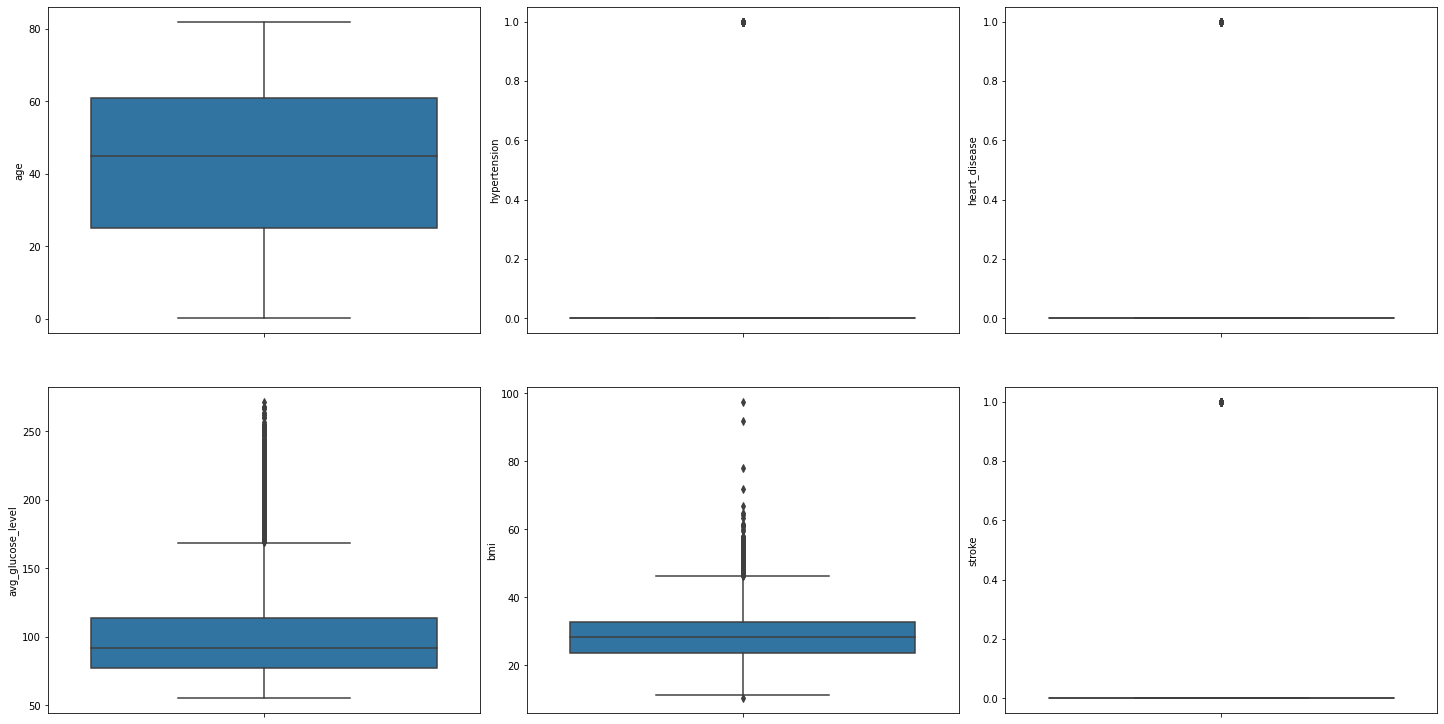

In [106]:
# create box plots
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in features2.items():
    sns.boxplot(y=col, data=features2, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

there are outliers in avg_glucose_level and bmi column. where hypertension and heart_dises have only 0 & 1 values <br>
there are many ways to handle outliers.<br>
1)remove outlier using IQR<br>
2)scaling data with Robust scaler in scikit-learn<br>
3)transformation of data

In [107]:
# we can transform data if data is greater than 50 than data is 50 else data own value.
bmi_outliers=df.loc[df['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

In [108]:
df["bmi"] = df["bmi"].apply(lambda x: 50 if x>50 else x)

In [109]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [110]:
# we can transform data if data is greater than 170 than data value is 170 else data own value.
age_glucose_outlier=df.loc[df['avg_glucose_level']>170]
bmi_outliers['avg_glucose_level'].shape

(79,)

In [111]:
df["avg_glucose_level"] = df["avg_glucose_level"].apply(lambda x: 170 if x>170 else x)

In [112]:
# second drop the categorical columns
a = df.dtypes[df.dtypes == "object"].index
features2 = df.drop(a, axis = 1)

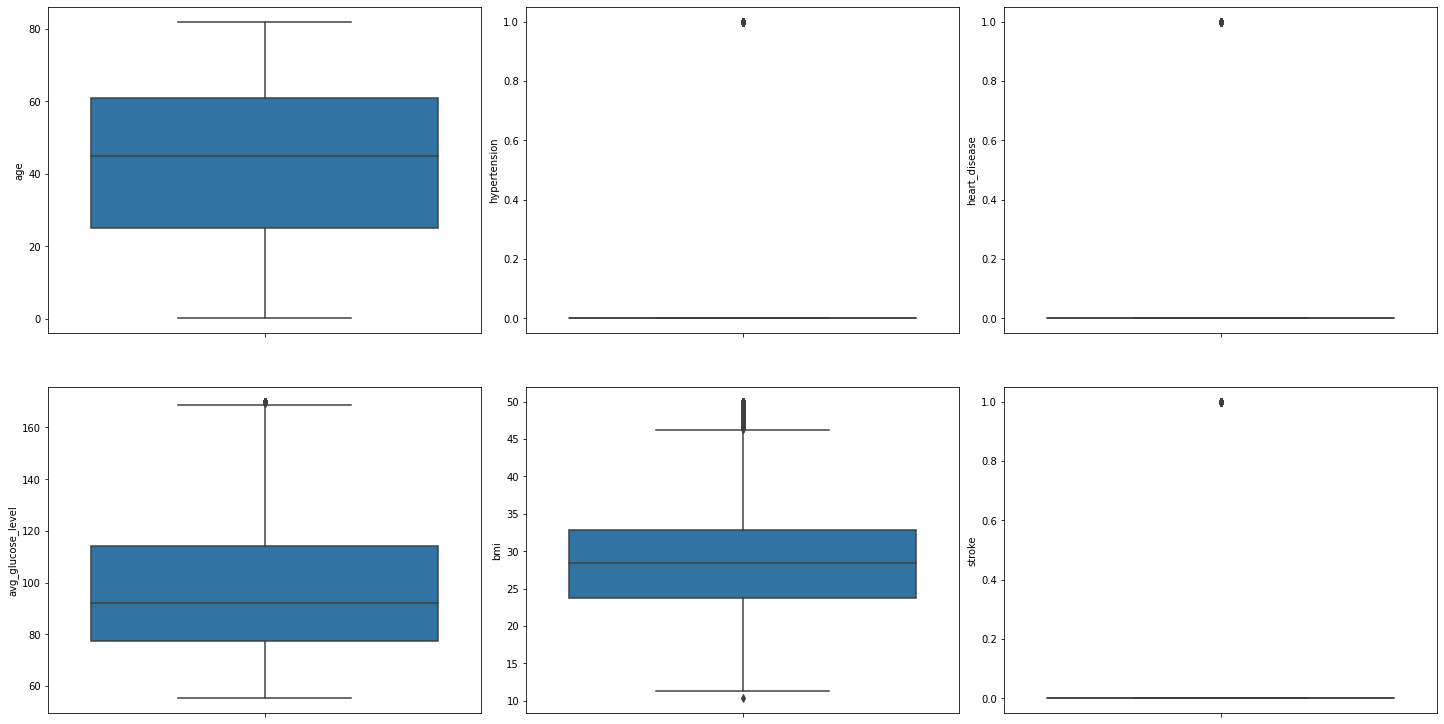

In [113]:
# create box plots
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in features2.items():
    sns.boxplot(y=col, data=features2, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

we can see that now we don't have much outlier. only some outlier is present.

### See the Distrubation of Data

In [116]:
# second drop the categorical columns
a = df.dtypes[df.dtypes == "object"].index
features3 = df.drop(a, axis = 1)

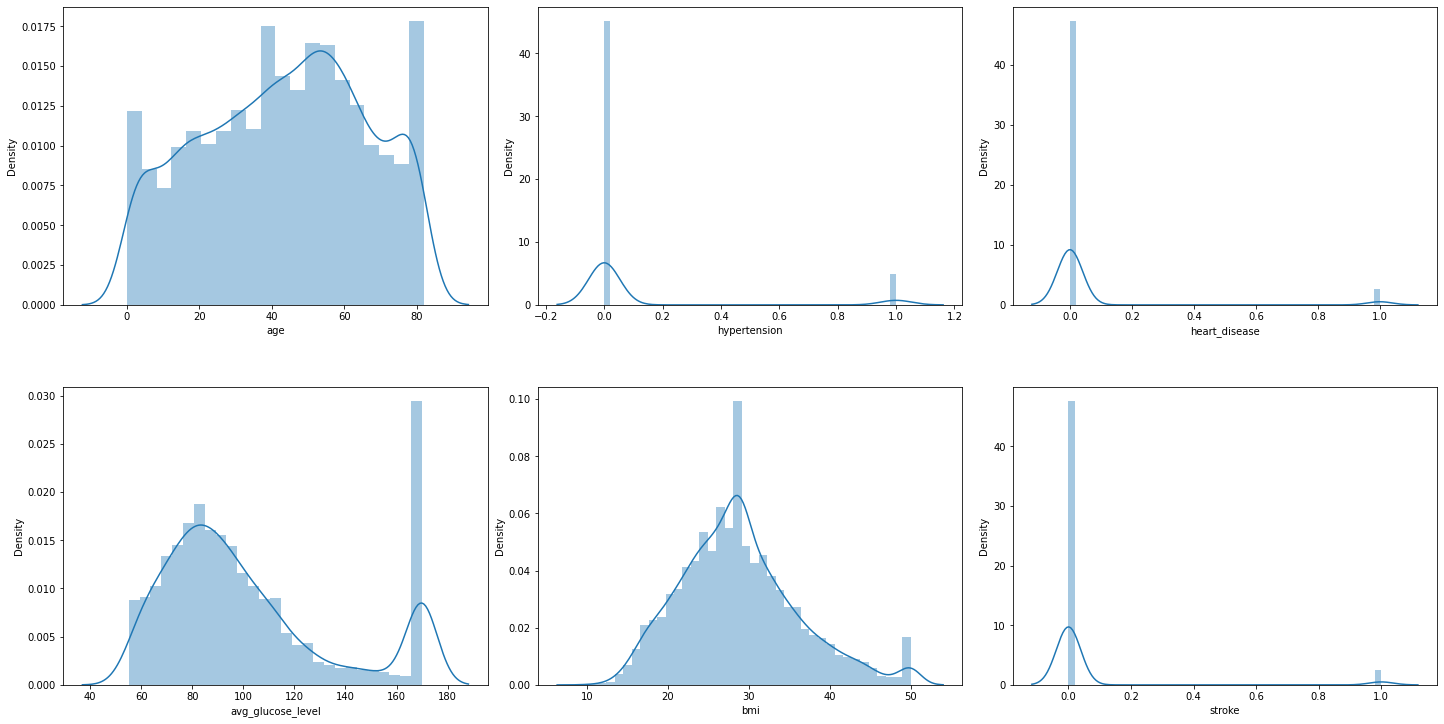

In [118]:
# create dist plot
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in features3.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

we can see that age column is slightly left skwness but it's ok.<br>
there are many way to handle righ & left skwness data <br>
1) log transform<br>
2) square-root transform <br>
3) box-cox transform<br>
also there are many ways

#Label encoding and OneHot encoding

In [119]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Product_importance'. 
tags=['gender', 'ever_married','Residence_type']
for tag in tags:
  df[tag]= label_encoder.fit_transform(df[tag])

In [120]:
df_onehot=df.copy(deep=True)
df_onehot = pd.get_dummies(df_onehot, columns=['work_type', 'smoking_status'])
# verifying
df_onehot.head(10)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,170.00,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,170.00,28.893237,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,170.00,34.400000,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,170.00,24.000000,1,0,0,0,1,0,0,0,1,0
5,1,81.0,0,0,1,1,170.00,29.000000,1,0,0,1,0,0,0,1,0,0
6,1,74.0,1,1,1,0,70.09,27.400000,1,0,0,1,0,0,0,0,1,0
7,0,69.0,0,0,0,1,94.39,22.800000,1,0,0,1,0,0,0,0,1,0
8,0,59.0,0,0,1,0,76.15,28.893237,1,0,0,1,0,0,1,0,0,0
9,0,78.0,0,0,1,1,58.57,24.200000,1,0,0,1,0,0,1,0,0,0


In [121]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int64  
 5   Residence_type                  5110 non-null   int64  
 6   avg_glucose_level               5110 non-null   float64
 7   bmi                             5110 non-null   float64
 8   stroke                          5110 non-null   int64  
 9   work_type_Govt_job              5110 non-null   uint8  
 10  work_type_Never_worked          5110 non-null   uint8  
 11  work_type_Private               5110 non-null   uint8  
 12  work_type_Self-employed         51

In [ ]:
df_dropped = df_onehot.drop(df_onehot.columns[[9,14 ]], axis = 1)  

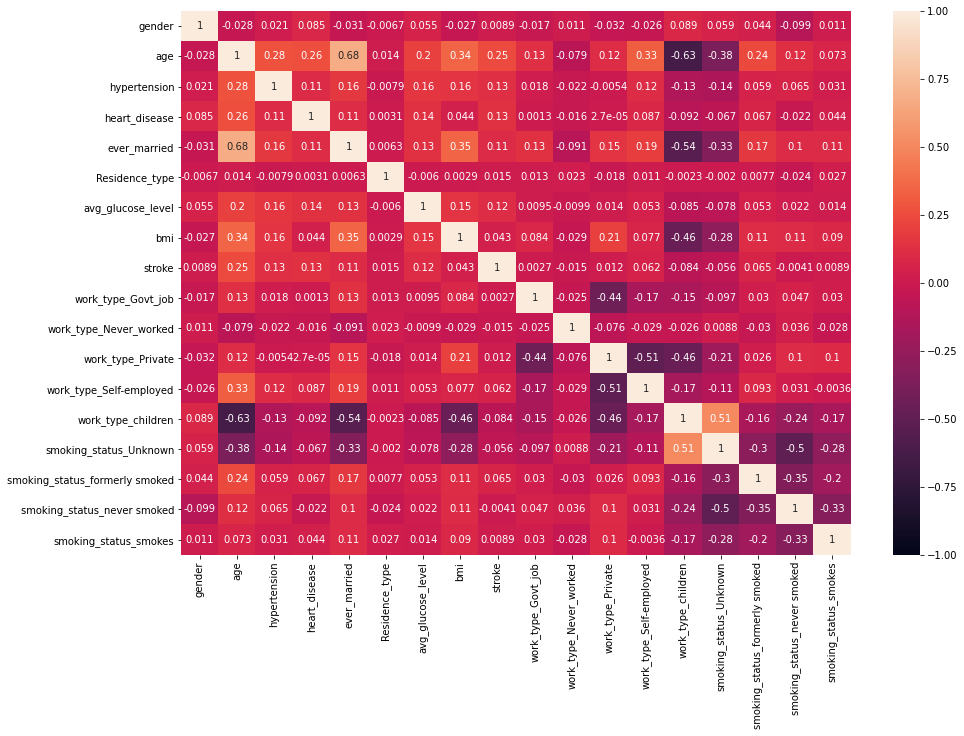

In [124]:
fig, ax = plt.subplots(figsize= (15,10))
sns.heatmap(df_onehot.corr(), annot=True, vmin=-1)

#Spliting the dataset

In [194]:
#x=df_onehot[['age'	,'hypertension'	,'heart_disease'	,'avg_glucose_level']]
X=df_onehot.drop(labels=['stroke' ], axis=1)
Y=df_onehot['stroke']

In [195]:
def split(df_independent, df_dependent):
    X_train, X_test, y_train, y_test = train_test_split(df_independent, df_dependent, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [196]:
X_train, X_test, y_train, y_test = split(X,Y)

#Base Model

In [197]:
#Function to evaluate the models and output the accuracy, precision, recall, F! score of the model
def evaluate(model, x_test, y_test):
  pred= model.predict(x_test)
  conf_mat = confusion_matrix(y_test, pred)
  
  #plotting Confusion Matrix
  class_label = [0,1]
  #df = pd.DataFrame(percent_matrix, index = class_label, columns = class_label)
  sns.heatmap(conf_mat, annot = True)
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()
  print('Score=', model.score(x_test, y_test))
  print('Recall=', recall_score(y_test, pred, average='weighted'))
  print('Precision=', precision_score(y_test, pred, average='weighted'))
  print('F1 score=', f1_score(y_test, pred, average='weighted'))
  print('roc score=', roc_auc_score(y_test, pred,average='weighted'))
  print(classification_report(y_test, pred))


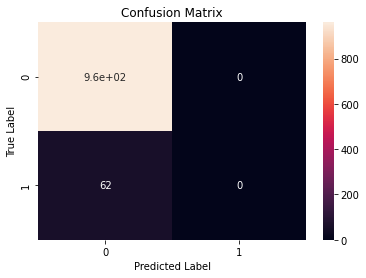

Score= 0.9393346379647749
Recall= 0.9393346379647749
Precision= 0.8823495620804148
F1 score= 0.9099508097337881
roc score= 0.5
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [198]:
log=LogisticRegression(max_iter=1000)
log.fit(X_train, y_train)
evaluate(log, X_test, y_test)


with output class 1(stroke) the f1-score is zero which is not right. we get this because our dataset is imbalanced there are two methods to balanced data.<br>
1)under sampling<br>
2)over sampling <br>
if we apply under sampling we lost our data so this is not right way. so we user over oversampling

#Oversampling With SMOTE

In [199]:
# transform the dataset
def over(X_train, y_train):
    oversample = SMOTE(random_state = 42)
    #X_red_smote, y_red_smote = oversample.fit_resample(X_red, y_red)
    X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
    return X_train_smote, y_train_smote

In [200]:
X_train_smote, y_train_smote = over(X_train, y_train)

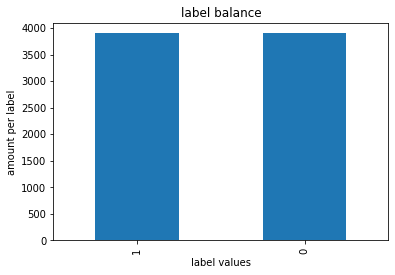

In [201]:
pd.Series(y_train_smote).value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

now our data is now balanced. so we can try other models

# Other Models

### logistic|

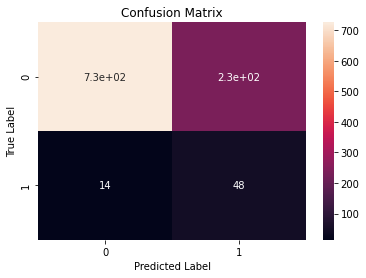

Score= 0.7573385518590998
Recall= 0.7573385518590998
Precision= 0.9318894611812127
F1 score= 0.819232159254272
roc score= 0.7652217741935483
              precision    recall  f1-score   support

           0       0.98      0.76      0.85       960
           1       0.17      0.77      0.28        62

    accuracy                           0.76      1022
   macro avg       0.58      0.77      0.57      1022
weighted avg       0.93      0.76      0.82      1022



In [202]:
logn=LogisticRegression(max_iter=1000)
logn.fit(X_train_smote, y_train_smote)
evaluate(logn, X_test, y_test)

### SVC

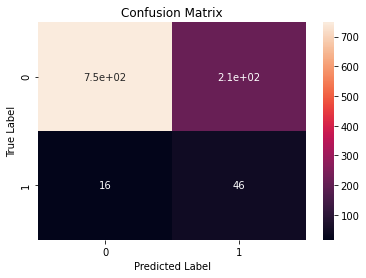

Score= 0.776908023483366
Recall= 0.776908023483366
Precision= 0.9304790132328832
F1 score= 0.8325483788213821
roc score= 0.7605510752688172
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       960
           1       0.18      0.74      0.29        62

    accuracy                           0.78      1022
   macro avg       0.58      0.76      0.58      1022
weighted avg       0.93      0.78      0.83      1022



In [203]:
from sklearn.svm import SVC
svmmodel =  SVC(kernel='poly')
svmmodel.fit(X_train_smote, y_train_smote)
evaluate(svmmodel, X_test, y_test)

### MultinomialNB

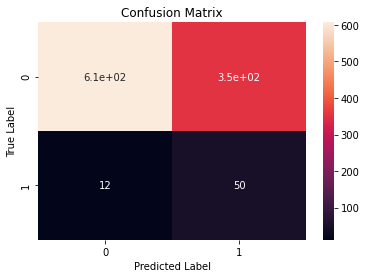

Score= 0.6428571428571429
Recall= 0.6428571428571429
Precision= 0.928651316373449
F1 score= 0.7352453330920715
roc score= 0.7193716397849463
              precision    recall  f1-score   support

           0       0.98      0.63      0.77       960
           1       0.12      0.81      0.22        62

    accuracy                           0.64      1022
   macro avg       0.55      0.72      0.49      1022
weighted avg       0.93      0.64      0.74      1022



In [204]:
from sklearn.naive_bayes import MultinomialNB

mnb= MultinomialNB()
mnb.fit(X_train_smote, y_train_smote)
evaluate(mnb, X_test, y_test)

### BernoulliNB

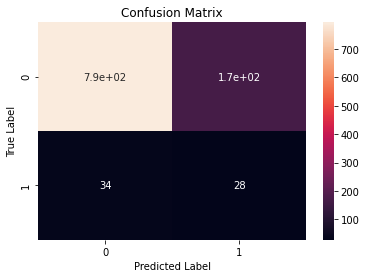

Score= 0.8043052837573386
Recall= 0.8043052837573386
Precision= 0.9095187512261986
F1 score= 0.8475341973233166
roc score= 0.6393481182795699
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       960
           1       0.14      0.45      0.22        62

    accuracy                           0.80      1022
   macro avg       0.55      0.64      0.55      1022
weighted avg       0.91      0.80      0.85      1022



In [205]:
bnb=BernoulliNB()
bnb.fit(X_train_smote, y_train_smote)
evaluate(bnb, X_test, y_test)

### Decision Tree

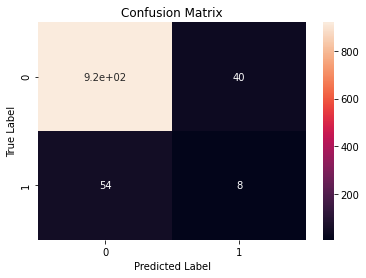

Score= 0.9080234833659491
Recall= 0.9080234833659491
Precision= 0.8973674305591833
F1 score= 0.9025033359353598
roc score= 0.5436827956989247
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.17      0.13      0.15        62

    accuracy                           0.91      1022
   macro avg       0.56      0.54      0.55      1022
weighted avg       0.90      0.91      0.90      1022



In [206]:
tree= DecisionTreeClassifier()
tree.fit(X_train_smote, y_train_smote)
evaluate(tree, X_test, y_test)

### RandomForest

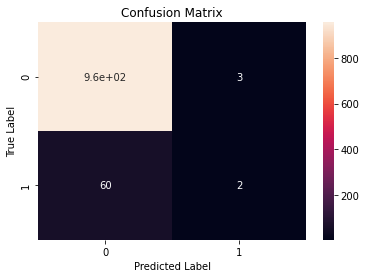

Score= 0.9383561643835616
Recall= 0.9383561643835616
Precision= 0.9081828100375803
F1 score= 0.9130231768796486
roc score= 0.5145665322580645
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.40      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.67      0.51      0.51      1022
weighted avg       0.91      0.94      0.91      1022



In [207]:
rfc=RandomForestClassifier()
rfc.fit(X_train_smote, y_train_smote)
evaluate(rfc, X_test, y_test) 

### Gradient Boosting

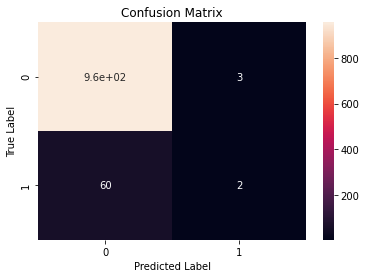

Score= 0.9383561643835616
Recall= 0.9383561643835616
Precision= 0.9081828100375803
F1 score= 0.9130231768796486
roc score= 0.5145665322580645
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.40      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.67      0.51      0.51      1022
weighted avg       0.91      0.94      0.91      1022



In [208]:
from sklearn.ensemble import GradientBoostingClassifier

gtb= GradientBoostingClassifier()
gtb.fit(X_train_smote, y_train_smote)
evaluate(gtb, X_test, y_test)

### Stacking 

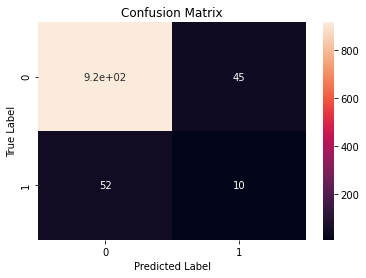

Score= 0.9050880626223092
Recall= 0.9050880626223092
Precision= 0.8998523964737788
F1 score= 0.9024212046867749
roc score= 0.5572076612903226
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.18      0.16      0.17        62

    accuracy                           0.91      1022
   macro avg       0.56      0.56      0.56      1022
weighted avg       0.90      0.91      0.90      1022



In [209]:
from sklearn.ensemble import StackingClassifier

estimators = [('lr', BernoulliNB()),('tree', DecisionTreeClassifier())]

clf = StackingClassifier(estimators=estimators, final_estimator=AdaBoostClassifier())
clf.fit(X_train_smote, y_train_smote)
evaluate(clf, X_test, y_test)

### Voting Classifier - Bagging

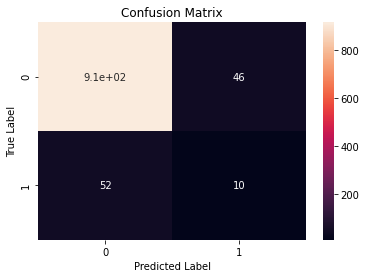

Score= 0.9041095890410958
Recall= 0.9041095890410958
Precision= 0.899603140839421
F1 score= 0.9018210592478954
roc score= 0.5566868279569893
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.18      0.16      0.17        62

    accuracy                           0.90      1022
   macro avg       0.56      0.56      0.56      1022
weighted avg       0.90      0.90      0.90      1022



In [210]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(
    estimators=[('lr', GaussianNB()), ('rf', DecisionTreeClassifier(criterion='gini', max_depth=21, min_samples_split=2,random_state=0, max_features=7))],
    voting='hard')

eclf.fit(X_train_smote, y_train_smote)
evaluate(eclf, X_test, y_test)

### extreme gradient boosting

In [211]:
import xgboost as xgb

D_train = xgb.DMatrix(X_train_smote,label= y_train_smote)
D_test = xgb.DMatrix(X_test.values, label=y_test.values)

In [212]:
param = {
    'booster':'dart',
    'eta': 0.001, 
    'max_depth': 7,  
    'num_class': 2,
    'n_estimators':2000,
    'objective':'multi:softprob',
    'sample_type':'weighted',
    'normalize_type':'forest',
    'tree_method':'gpu_hist'} 


steps = 200  # The number of training iterations

In [213]:
bst = xgb.train(param, D_train, steps)

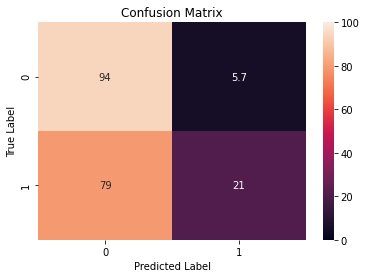

accuracy= 0.898238747553816
Roc score= 0.576192876344086
F1 score= 0.9004275837530443
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       960
           1       0.19      0.21      0.20        62

    accuracy                           0.90      1022
   macro avg       0.57      0.58      0.57      1022
weighted avg       0.90      0.90      0.90      1022



In [214]:
preds = bst.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])
conf_mat = confusion_matrix(y_test, best_preds)
percent_matrix = (conf_mat.T/conf_mat.sum(axis=1)*100).T
#plotting Confusion Matrix
class_label = [0,1]
df = pd.DataFrame(percent_matrix, index = class_label, columns = class_label)
sns.heatmap(percent_matrix, annot = True, vmax=100, vmin=0)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print('accuracy=', accuracy_score(y_test, best_preds))
print('Roc score=', roc_auc_score(y_test, best_preds))
print('F1 score=', f1_score(y_test, best_preds,average='weighted'))
print(classification_report(y_test, best_preds))


#Tuning hyperparameters of various models

##SVM

In [171]:
from sklearn.model_selection import GridSearchCV 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'sigmoid']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.588, total=   2.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.583, total=   2.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.579, total=   2.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.580, total=   2.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.582, total=   2.4s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.500, total=   1.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.500, total=   1.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.500, total=   1.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.500, total=   1.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  8.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [174]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


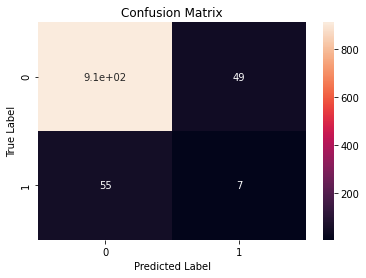

Score= 0.898238747553816
Recall= 0.898238747553816
Precision= 0.8934360224137302
F1 score= 0.8958101036916439
roc score= 0.5309307795698924
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       960
           1       0.12      0.11      0.12        62

    accuracy                           0.90      1022
   macro avg       0.53      0.53      0.53      1022
weighted avg       0.89      0.90      0.90      1022



In [177]:

svmmodel =  SVC(C= 1000, gamma= 0.01, kernel= 'rbf',)
svmmodel.fit(X_train_smote, y_train_smote)
evaluate(svmmodel, X_test, y_test)

##Decision Tree

In [179]:
# from sklearn.metrics import roc_curve, auc

In [182]:
decision = DecisionTreeClassifier()
tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
gridsearch2 = GridSearchCV(decision, tree_param)
gridsearch2.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [183]:
# print best parameter after tuning
print(gridsearch2.best_params_)

# print how our model looks after hyper-parameter tuning
print(gridsearch2.best_estimator_)

{'criterion': 'entropy', 'max_depth': 150}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=150, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


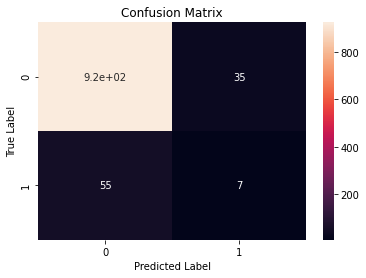

Score= 0.9119373776908023
Recall= 0.9119373776908023
Precision= 0.896727771343371
F1 score= 0.9039237488962103
roc score= 0.5382224462365591
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.17      0.11      0.13        62

    accuracy                           0.91      1022
   macro avg       0.56      0.54      0.54      1022
weighted avg       0.90      0.91      0.90      1022



In [219]:
tree= DecisionTreeClassifier(criterion= 'entropy', max_depth= 150)
tree.fit(X_train_smote, y_train_smote)
evaluate(tree, X_test, y_test)

In [186]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid2 = GridSearchCV(estimator=xgboost, param_grid=parameters, verbose=3)
grid2.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=2, n_estimators=60, score=0.871, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=60, score=0.978, total=   0.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=60, score=0.958, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=60, score=0.976, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=60, score=0.964, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=100, score=0.867, total=   0.3s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=100, score=0.991, total=   0.3s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=2, n_estimators=100, score=0.986, total=   0.3s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[CV]  le

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  7.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},

In [215]:
# print best parameter after tuning
print(grid2.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid2.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 180}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [216]:
xgboost= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgboost.fit(X_train_smote, y_train_smote)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.20      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.57      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022



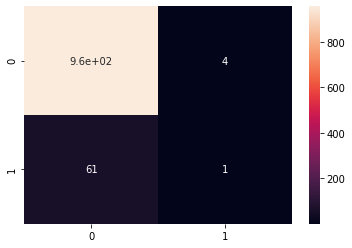

In [223]:
y_pred = xgboost.predict(X_test.values)
con = confusion_matrix(y_test, y_pred)
sns.heatmap(con, annot=True)
print(classification_report(y_test, y_pred))

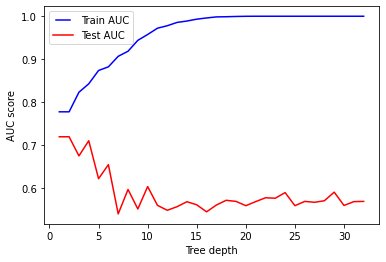

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train_smote, y_train_smote)
   train_pred = dt.predict(X_train_smote)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_smote, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

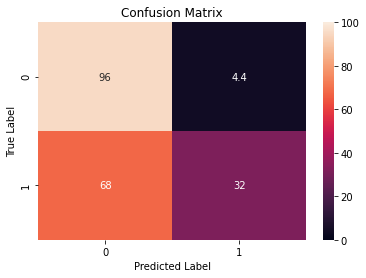

Score= 0.9246575342465754
Recall= 0.9246575342465754
Precision= 0.930764740728525
F1 score= 0.9275927879795763
roc score= 0.637880658436214


In [ ]:
#Tuned decision tree model
tree= DecisionTreeClassifier(criterion='gini', 
                             max_depth=21, 
                             min_samples_split=2,
                             random_state=0, 
                             max_features=7)
tree.fit(X_train_smote, y_train_smote)
evaluate(tree, X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
dec_tree = DecisionTreeClassifier()
ftwo_scorer = make_scorer(f1_score)
n_components = list(range(1,X.shape[1]+1,1))
max_depth = range(3, 30)
random_state=range(0,30)
parameters = dict(max_features=n_components,
                  max_depth=max_depth, 
                  random_state=random_state)
clf_GS = GridSearchCV(dec_tree, parameters, 
                      scoring=ftwo_scorer)
clf_GS.fit(X_train_smote, y_train_smote)
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['max_features'])
print(clf_GS.best_estimator_.get_params())

Best Criterion: gini
Best Number Of Components: 6
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 21, 'max_features': 6, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 10, 'splitter': 'best'}


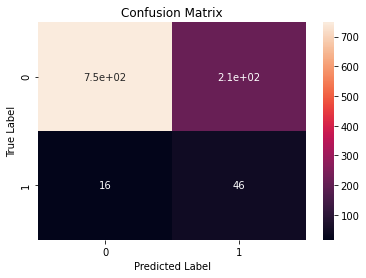

Score= 0.776908023483366
Recall= 0.776908023483366
Precision= 0.9304790132328832
F1 score= 0.8325483788213821
roc score= 0.7605510752688172
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       960
           1       0.18      0.74      0.29        62

    accuracy                           0.78      1022
   macro avg       0.58      0.76      0.58      1022
weighted avg       0.93      0.78      0.83      1022



In [225]:
from sklearn.svm import SVC
svmmodel =  SVC(kernel='poly')
svmmodel.fit(X_train_smote, y_train_smote)
evaluate(svmmodel, X_test, y_test)

#Dumping the best performing model

After train multiple model we can see that SVC is best model for this dataset.
we can also experiment with diffrent parameters and also try hyper parameter tuning with diffrent algorithms

In [226]:
from sklearn.externals import joblib

joblib.dump(svmmodel,'bst_model.pkl', compress=True)

['bst_model.pkl']

In [ ]:
import pickle
with open("model.pickle", "wb") as f:
  pickle.dump(tree, f)